This notebooks shows how to load the data form the cluster.

In [1]:
# experimentgpubig4n

In [36]:
pwd

'/Users/pellegrinraphael/Desktop/Harvard/Year_2/ME_thesis/NNCaustics-BranchedFlows/Experiments/Cluster/Non_TL/Non_loop_optimization/Non-S2S/FinalTime14_time_scaling/expt1_3'

In [66]:
cd /Users/pellegrinraphael/Desktop/Harvard/Year_2/ME_thesis/NNCaustics-BranchedFlows/Experiments/Cluster/Non_TL/Non_loop_optimization/Non-S2S/FinalTime14_time_scaling/expt1_5

/Users/pellegrinraphael/Desktop/Harvard/Year_2/ME_thesis/NNCaustics-BranchedFlows/Experiments/Cluster/Non_TL/Non_loop_optimization/Non-S2S/FinalTime14_time_scaling/expt1_5


In [67]:
ls

Clustergpubig4.py
GPUbig4.sh
Head_0Initial_x_0final_t_14alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_50000grid_size_2000TrajectoriesNumerical_px.p
Head_0Initial_x_0final_t_14alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_50000grid_size_2000TrajectoriesNumerical_py.p
Head_0Initial_x_0final_t_14alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_50000grid_size_2000TrajectoriesNumerical_x.p
Head_0Initial_x_0final_t_14alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_50000grid_size_2000TrajectoriesNumerical_y.p
Head_0Initial_x_0final_t_14alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_50000grid_size_2000Trajectory_NN_px.p
Head_0Initial_x_0final_t_14alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_50000grid_size_2000Trajectory_NN_py.p
Head_0Initial_x_0final_t_14alpha_1width_64width_heads_32energyconservation_True_nor

In [68]:
import numpy as np
import copy
import pickle
import string
import json

import matplotlib.pyplot as plt

In [69]:
initial_x=0
final_t=14
alpha_=1
width_=64
width_heads=32
epochs_=50000
grid_size=2000
energy_conservation=True
norm_clipping=True
number_of_heads=1

In [70]:
import torch

In [71]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+\
  'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Network_state'+'.p'

#networkstate=pickle.load(open(filename,"rb"))

In [72]:
#networkstate;

In [73]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+\
  'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'loss'+'.p'

loss=pickle.load(open(filename,"rb"))

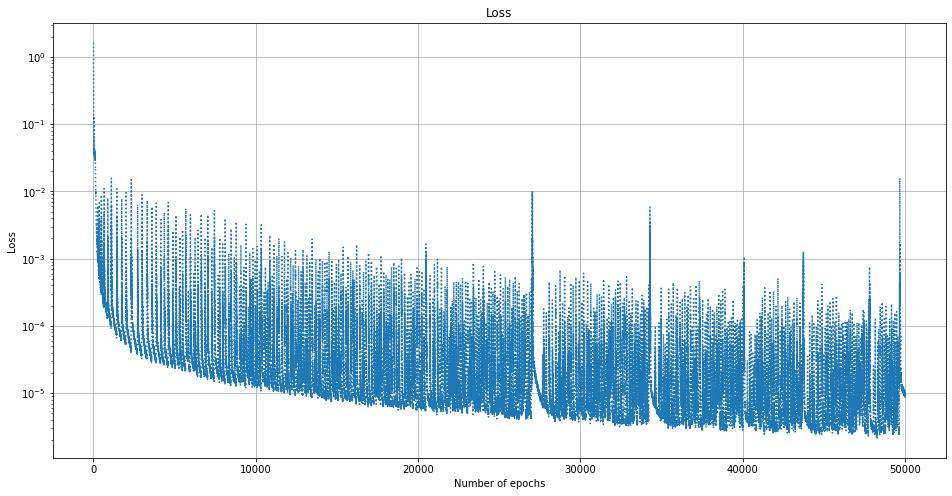

In [74]:
f,ax=plt.subplots(1,1,figsize=(16,8))
ax.grid()
ax.set_title("Loss")
ax.set_xlabel("Number of epochs")
ax.set_ylabel("Loss")
ax.plot(range(len(loss)),loss, ls='dotted')
ax.set_yscale('log')
if number_of_heads>1:
    filename_p = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+\
      'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
      'energyconservation_'+str(energy_conservation)+\
      '_normclipping_'+str(norm_clipping)+'_'\
      'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'losses_part'+'.p'
    loss_p=pickle.load(open(filename_p,"rb"))
    for j in range(number_of_heads):
        ax.plot(range(len(loss_p[j])),loss_p[j], alpha=0.2, linestyle='-')

Text(0, 0.5, '$y$')

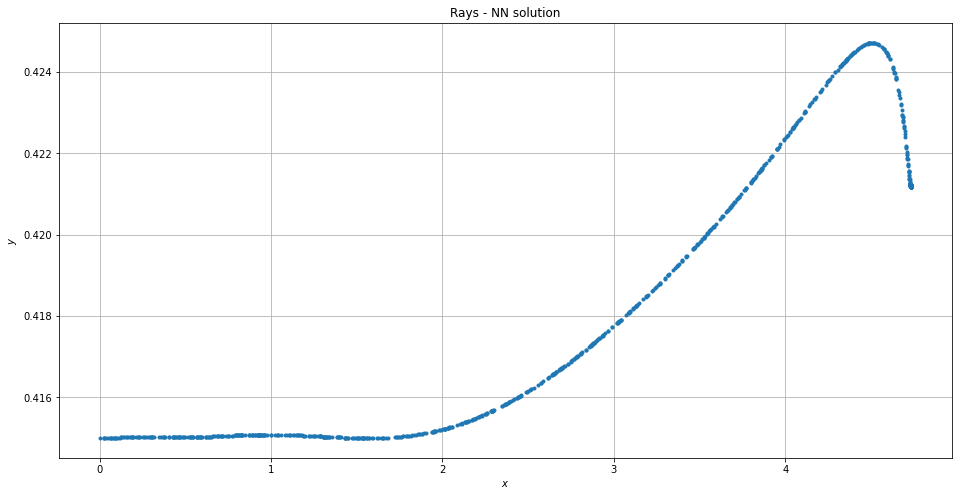

In [75]:
Trajectories_NN_x=dict()
Trajectories_NN_y=dict()
Trajectories_NN_px=dict()
Trajectories_NN_py=dict()

f,ax=plt.subplots(1,1,figsize=(16,8))

for m in range(number_of_heads):
    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+\
        'Trajectory_NN_x'+'.p'
    


    NNx=pickle.load(open(filename,"rb"))
    Trajectories_NN_x[m]=NNx
    

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+\
        'Trajectory_NN_y'+'.p'

    NNy=pickle.load(open(filename,"rb"))
    Trajectories_NN_y[m]=NNy
    
    ax.plot(NNx,NNy,'.', label="NN solution of SDE stoc for {} head".format(m+1))

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+\
        'Trajectory_NN_px'+'.p'

    NNpx=pickle.load(open(filename,"rb"))
    Trajectories_NN_px[m]=NNpx

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Trajectory_NN_py'+'.p'

    NNpy=pickle.load(open(filename,"rb"))
    Trajectories_NN_py[m]=NNpy
    
# Make a grid, set the title and the labels
ax.grid()
ax.set_title("Rays - NN solution")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [76]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Initial_conditions'+'.p'
Initial_conditions=pickle.load(open(filename,"rb"))

In [77]:
Initial_conditions;

In [78]:
for i in Initial_conditions:
    print("The initial condition is {}".format(Initial_conditions[i]))

The initial condition is 0.415


In [79]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'d_comparaison'+'.p'
#Network=pickle.load(open(filename,"rb"))

In [80]:
#Network;

Text(0, 0.5, '$y$')

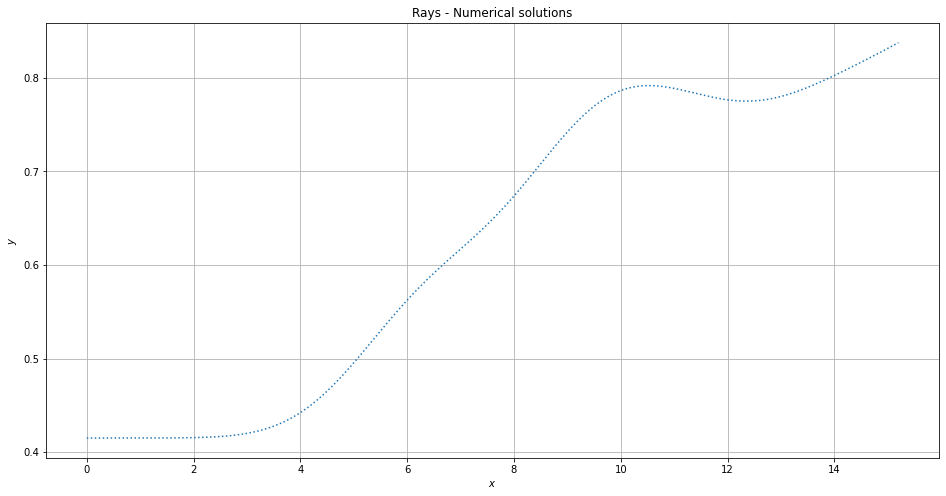

In [81]:
f,ax=plt.subplots(1,1,figsize=(16,8))

for m in range(number_of_heads):    
    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_x'+'.p'

    Numericalx=pickle.load(open(filename,"rb"))

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_y'+'.p'

    Numericaly=pickle.load(open(filename,"rb"))
    
    ax.plot(Numericalx,Numericaly, ls=':', label="NN solution of SDE stoc for {} head".format(m+1))

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_px'+'.p'

    Numericalpx=pickle.load(open(filename,"rb"))

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_py'+'.p'

    Numericalpy=pickle.load(open(filename,"rb"))
    
# Make a grid, set the title and the labels
ax.grid()
ax.set_title("Rays - Numerical solutions")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [82]:
Numericalx;

In [83]:
Numericaly;

In [84]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Means'+'.p'
Means=pickle.load(open(filename,"rb"))

In [85]:
Means;

In [86]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Grid'+'.p'
Grid=pickle.load(open(filename,"rb"))

In [87]:
Grid;

In [88]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Grid_potential_values'+'.p'
Grid_potential_value=pickle.load(open(filename,"rb"))

In [89]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Grid-x1'+'.p'
Gridx1=pickle.load(open(filename,"rb"))

In [90]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Grid-y1'+'.p'
Gridy1=pickle.load(open(filename,"rb"))

In [91]:
Grid_potential_value

array([[-2.32625380e-10, -2.74943913e-10, -3.24621778e-10, ...,
        -4.52633236e-05, -4.01781814e-05, -3.56830891e-05],
       [-2.37799283e-10, -2.81059094e-10, -3.31841934e-10, ...,
        -4.56507083e-05, -4.05269495e-05, -3.59978695e-05],
       [-2.43080413e-10, -2.87301011e-10, -3.39211729e-10, ...,
        -4.60409601e-05, -4.08784060e-05, -3.63151853e-05],
       ...,
       [-2.90588952e-07, -3.36965998e-07, -3.91084713e-07, ...,
        -1.32342612e-02, -1.36733220e-02, -1.41214975e-02],
       [-2.93499362e-07, -3.40206118e-07, -3.94701751e-07, ...,
        -1.33857053e-02, -1.38301285e-02, -1.42836995e-02],
       [-2.96453632e-07, -3.43492178e-07, -3.98366868e-07, ...,
        -1.35385779e-02, -1.39884095e-02, -1.44474218e-02]])

Text(0, 0.5, '$y$')

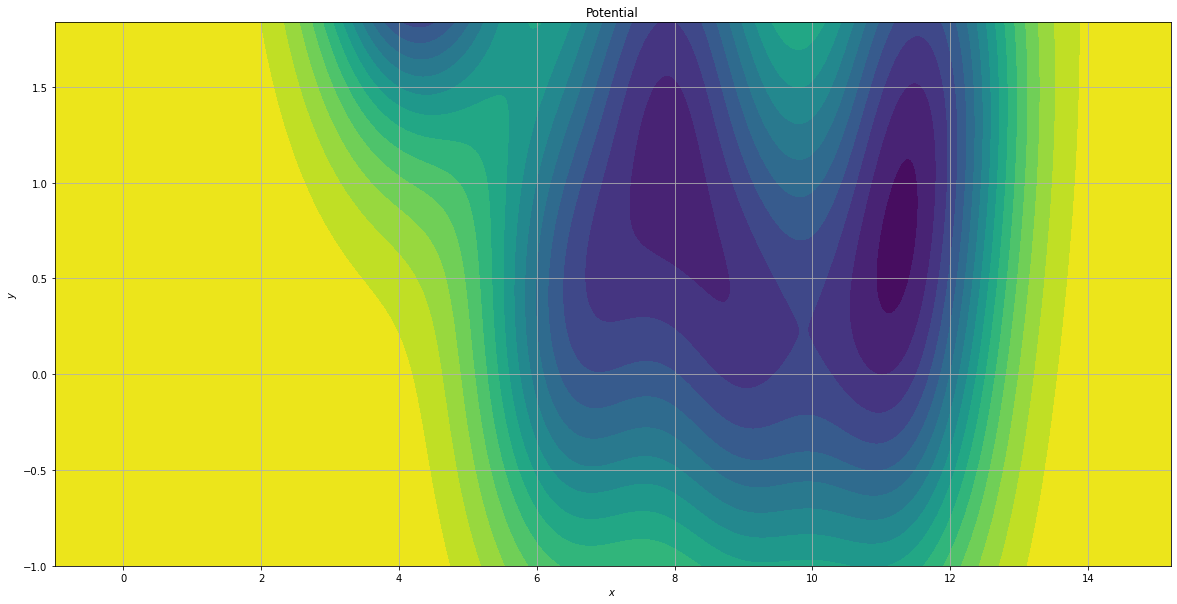

In [92]:
f, ax =plt.subplots(1,1, figsize=(20,10))
ax.contourf(Gridx1,Gridy1,Grid_potential_value,levels=20);
ax.grid()
ax.set_title("Potential")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

Text(0, 0.5, '$y$')

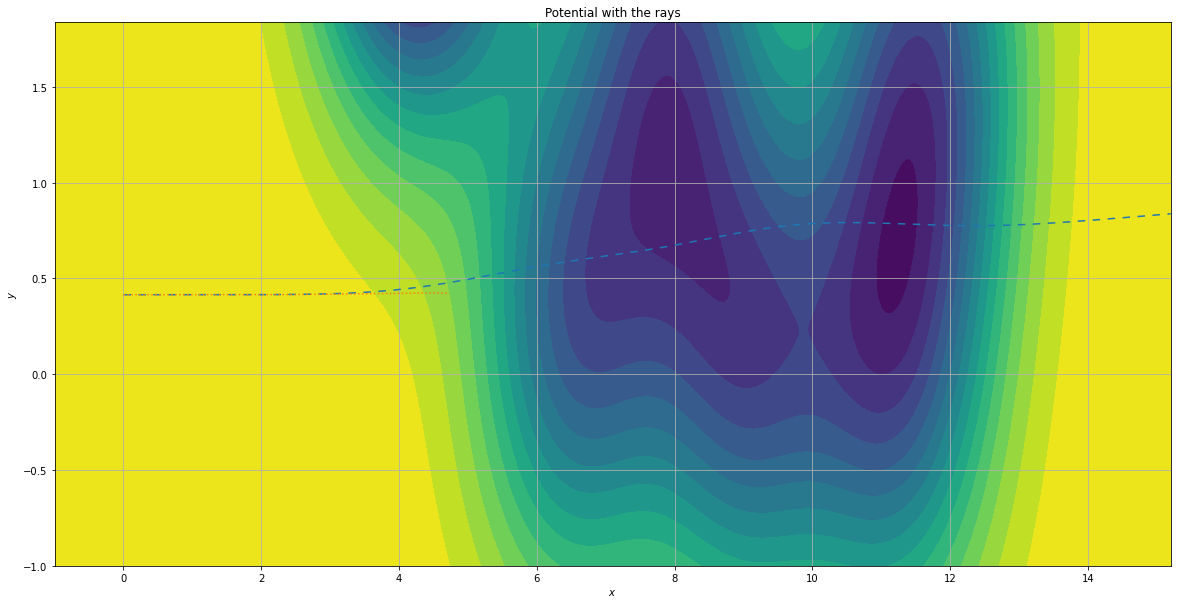

In [93]:
f, ax =plt.subplots(1,1, figsize=(20,10))
ax.contourf(Gridx1,Gridy1,Grid_potential_value,levels=20);
for m in range(number_of_heads):    
    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_x'+'.p'

    Numericalx=pickle.load(open(filename,"rb"))

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_y'+'.p'

    Numericaly=pickle.load(open(filename,"rb"))
    
    ax.plot(Numericalx,Numericaly, ls=(0,(5,5)), label="NN solution of SDE stoc for {} head".format(m+1))
    
for m in range(number_of_heads):
    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+\
        'Trajectory_NN_x'+'.p'
    

    NNx=pickle.load(open(filename,"rb"))
    Trajectories_NN_x[m]=NNx
    

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+\
        'Trajectory_NN_y'+'.p'

    NNy=pickle.load(open(filename,"rb"))
    Trajectories_NN_y[m]=NNy
    
    ax.plot(NNx,NNy, ls=':', label="NN solution of SDE stoc for {} head".format(m+1))
    
ax.grid()
ax.set_title("Potential with the rays")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

Could also recreate the potential from the means.

Scale input.

Batch normalization: normalize output of layer. Use pytorch batchnorm.

### To try tonight:

* On the same 200 gaussian potential, try initial velocity (0,50) and time from 0 to 1 and y_initial in (0,1)

* Scale the potential to (0,1) 2 by deviding means by 50 and std 50 in with initial velocity (0,1). Initial y value is between 0 and 1.

* 

$\tilde{x}=\mu x$

$\tilde{y}=\mu y$